In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
df = pd.read_csv("../../Data/sangwonKim/pop_house_car_inout.csv")
df

,년도,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,38005651,1520090,1620640
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,17380896,478451,496161
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,14583073,351873,363224
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,20097823,461613,439578
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,8351445,226696,229288
...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,NaN,NaN,11461086,199432,204547
166,2022,전라남도,1817697,915272,902425,NaN,NaN,13688569,191956,192301
167,2022,경상북도,2600492,1311881,1288611,NaN,NaN,17878739,263156,270822
168,2022,경상남도,3280493,1651675,1628818,NaN,NaN,21770014,323211,341758


In [5]:
birth = pd.read_csv("../../Data/sangwonKim/출생아수_시도_2013_2021.csv", encoding='euc-kr')
birth.columns = ['년도', '시도', '출생아수']
birth

,년도,시도,출생아수
0,2013,서울특별시,84066
1,2013,부산광역시,25831
2,2013,대구광역시,19340
3,2013,인천광역시,25560
4,2013,광주광역시,12729
...,...,...,...
148,2021,전라북도,7475
149,2021,전라남도,8430
150,2021,경상북도,12045
151,2021,경상남도,15562


In [6]:
df_2 = pd.merge(df, birth, how='left', on=['년도', '시도'])
df_2 = df_2[['년도','시도','총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구','주택수','빈집수','자동차등록대수']]
df_2

,년도,시도,총 인구,남성 인구,여성 인구,출생아수,전입인구,전출인구,주택수,빈집수,자동차등록대수
0,2013,서울특별시,10143645,5007869,5135776,84066.0,1520090,1620640,NaN,NaN,38005651
1,2013,부산광역시,3527635,1747000,1780635,25831.0,478451,496161,NaN,NaN,17380896
2,2013,대구광역시,2501588,1246071,1255517,19340.0,351873,363224,NaN,NaN,14583073
3,2013,인천광역시,2879782,1448835,1430947,25560.0,461613,439578,NaN,NaN,20097823
4,2013,광주광역시,1472910,730216,742694,12729.0,226696,229288,NaN,NaN,8351445
...,...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,NaN,199432,204547,NaN,NaN,11461086
166,2022,전라남도,1817697,915272,902425,NaN,191956,192301,NaN,NaN,13688569
167,2022,경상북도,2600492,1311881,1288611,NaN,263156,270822,NaN,NaN,17878739
168,2022,경상남도,3280493,1651675,1628818,NaN,323211,341758,NaN,NaN,21770014


In [7]:
df_3 = df_2.dropna(axis=0)
df_3

,년도,시도,총 인구,남성 인구,여성 인구,출생아수,전입인구,전출인구,주택수,빈집수,자동차등록대수
34,2015,서울특별시,10022181,4930943,5091238,83005.0,1589431,1726687,2793244.0,79049.0,38005651
35,2015,부산광역시,3513777,1735570,1778207,26645.0,507031,520591,1164352.0,86626.0,17380896
36,2015,대구광역시,2487829,1237291,1250538,19438.0,351424,364364,738100.0,29610.0,14583073
37,2015,인천광역시,2925815,1469869,1455946,25491.0,473223,463685,942244.0,47402.0,20097823
38,2015,광주광역시,1472199,729662,742537,12441.0,224603,233875,486527.0,26705.0,8351445
...,...,...,...,...,...,...,...,...,...,...,...
148,2021,전라북도,1786855,888994,897861,7475.0,223710,229511,747880.0,89358.0,11461086
149,2021,전라남도,1832803,922221,910582,8430.0,223619,228106,811478.0,116001.0,13688569
150,2021,경상북도,2626609,1323661,1302948,12045.0,317866,314529,1103666.0,129848.0,17878739
151,2021,경상남도,3314183,1668338,1645845,15562.0,374782,388485,1306263.0,138586.0,21770014


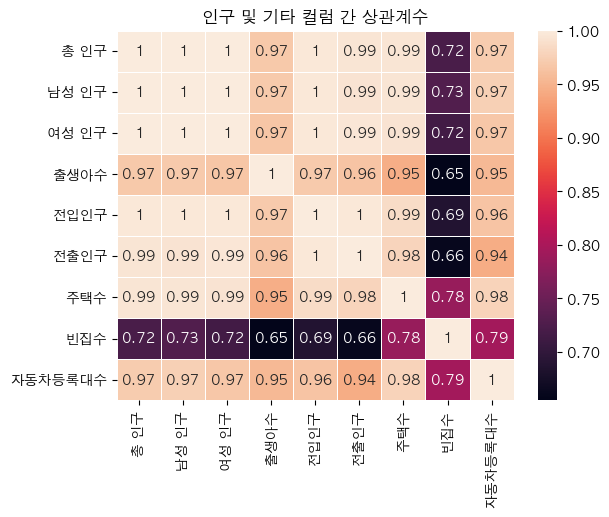

In [48]:
# ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구','주택수','빈집수','자동차등록대수'] 대한 상관관계 시각화
target_col = ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구','주택수','빈집수','자동차등록대수']

# plt.figure(figsize=(10,10))
sns.heatmap(
    df_3[target_col].corr(),
    annot = True, # True로 해야 숫자가 보임
    # fmt = 'f', # 실수
    linewidth = 0.5
)
plt.title('인구 및 기타 컬럼 간 상관계수')
plt.show()

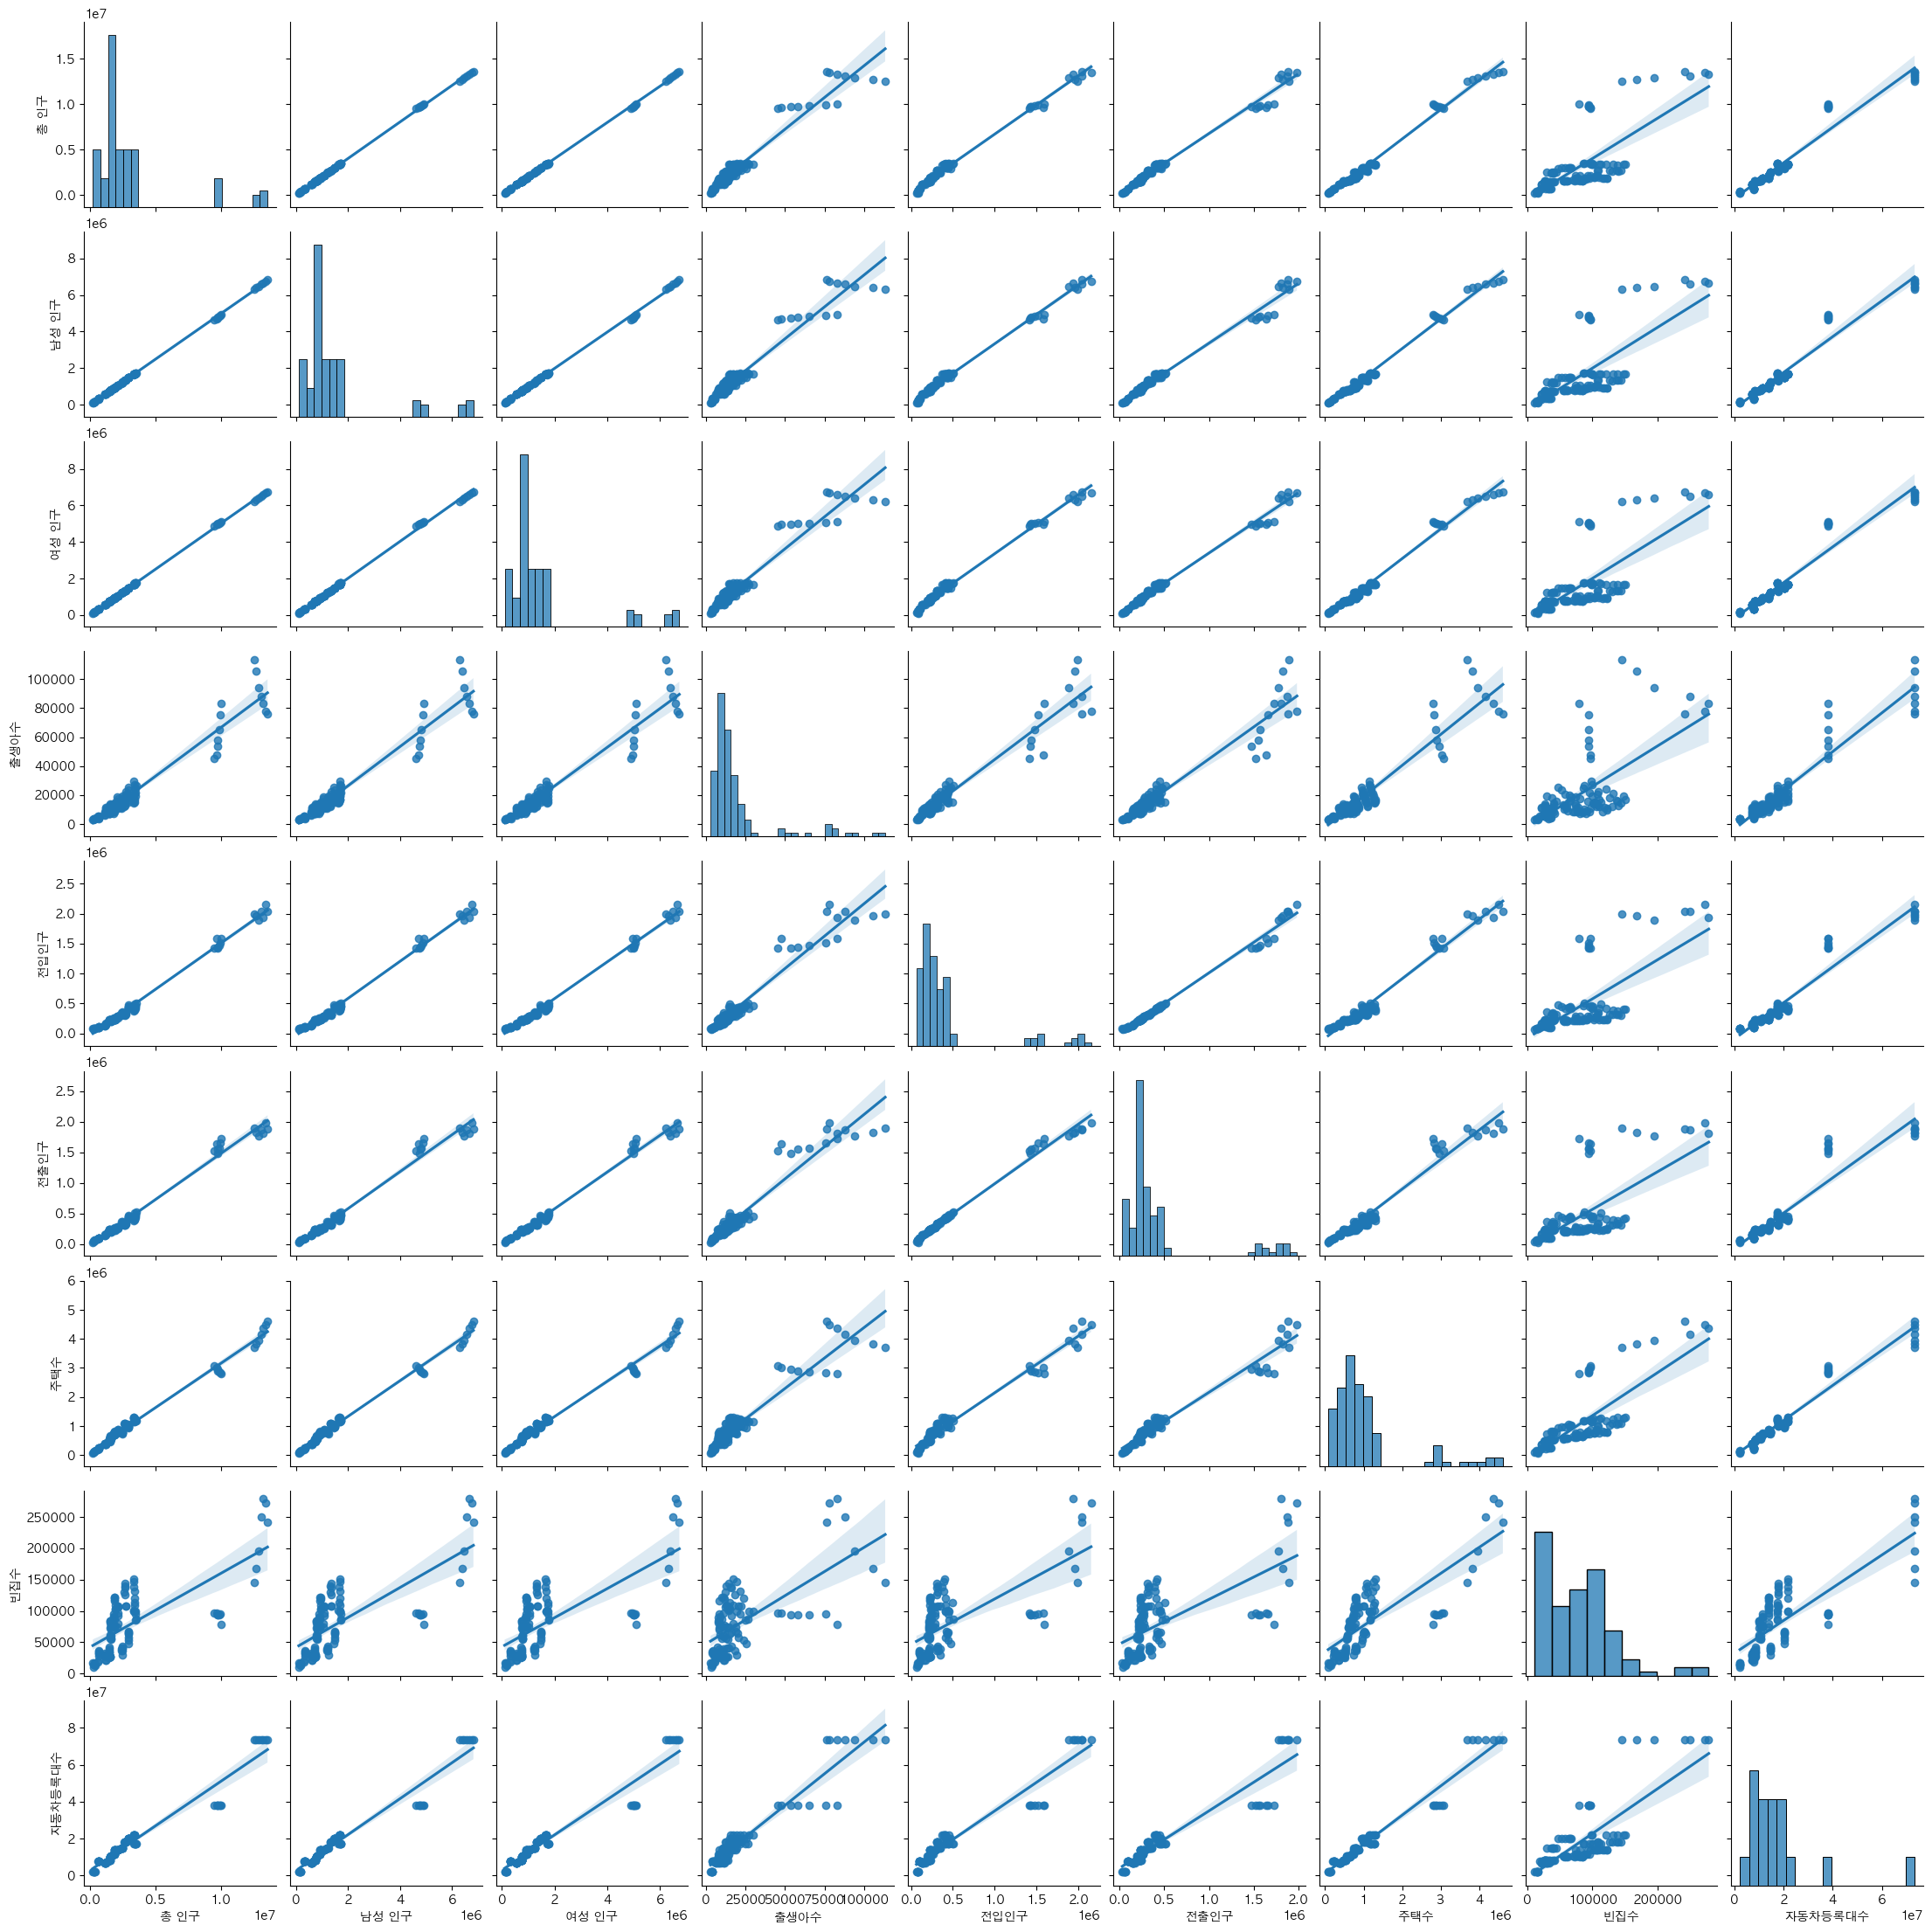

In [9]:
# ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구','주택수','빈집수','자동차등록대수'] 대한 상관관계 시각화
target_col = ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구','주택수','빈집수','자동차등록대수']

sns.pairplot(
    df_3[target_col],
    vars = target_col,
    kind = 'reg'
)
plt.show()

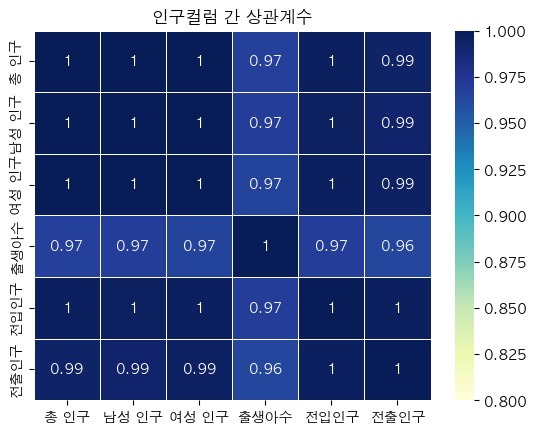

In [75]:
# ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구'] 대한 상관관계 시각화
target_col = ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구']

# plt.figure(figsize=(10,10))
sns.heatmap(
    df_3[target_col].corr(),
    annot = True, # True로 해야 숫자가 보임
    # fmt = 'f', # 실수
    cmap='YlGnBu',
    vmin=0.8, vmax=1,
    linewidth = 0.5
)
plt.title('인구컬럼 간 상관계수')
plt.show()

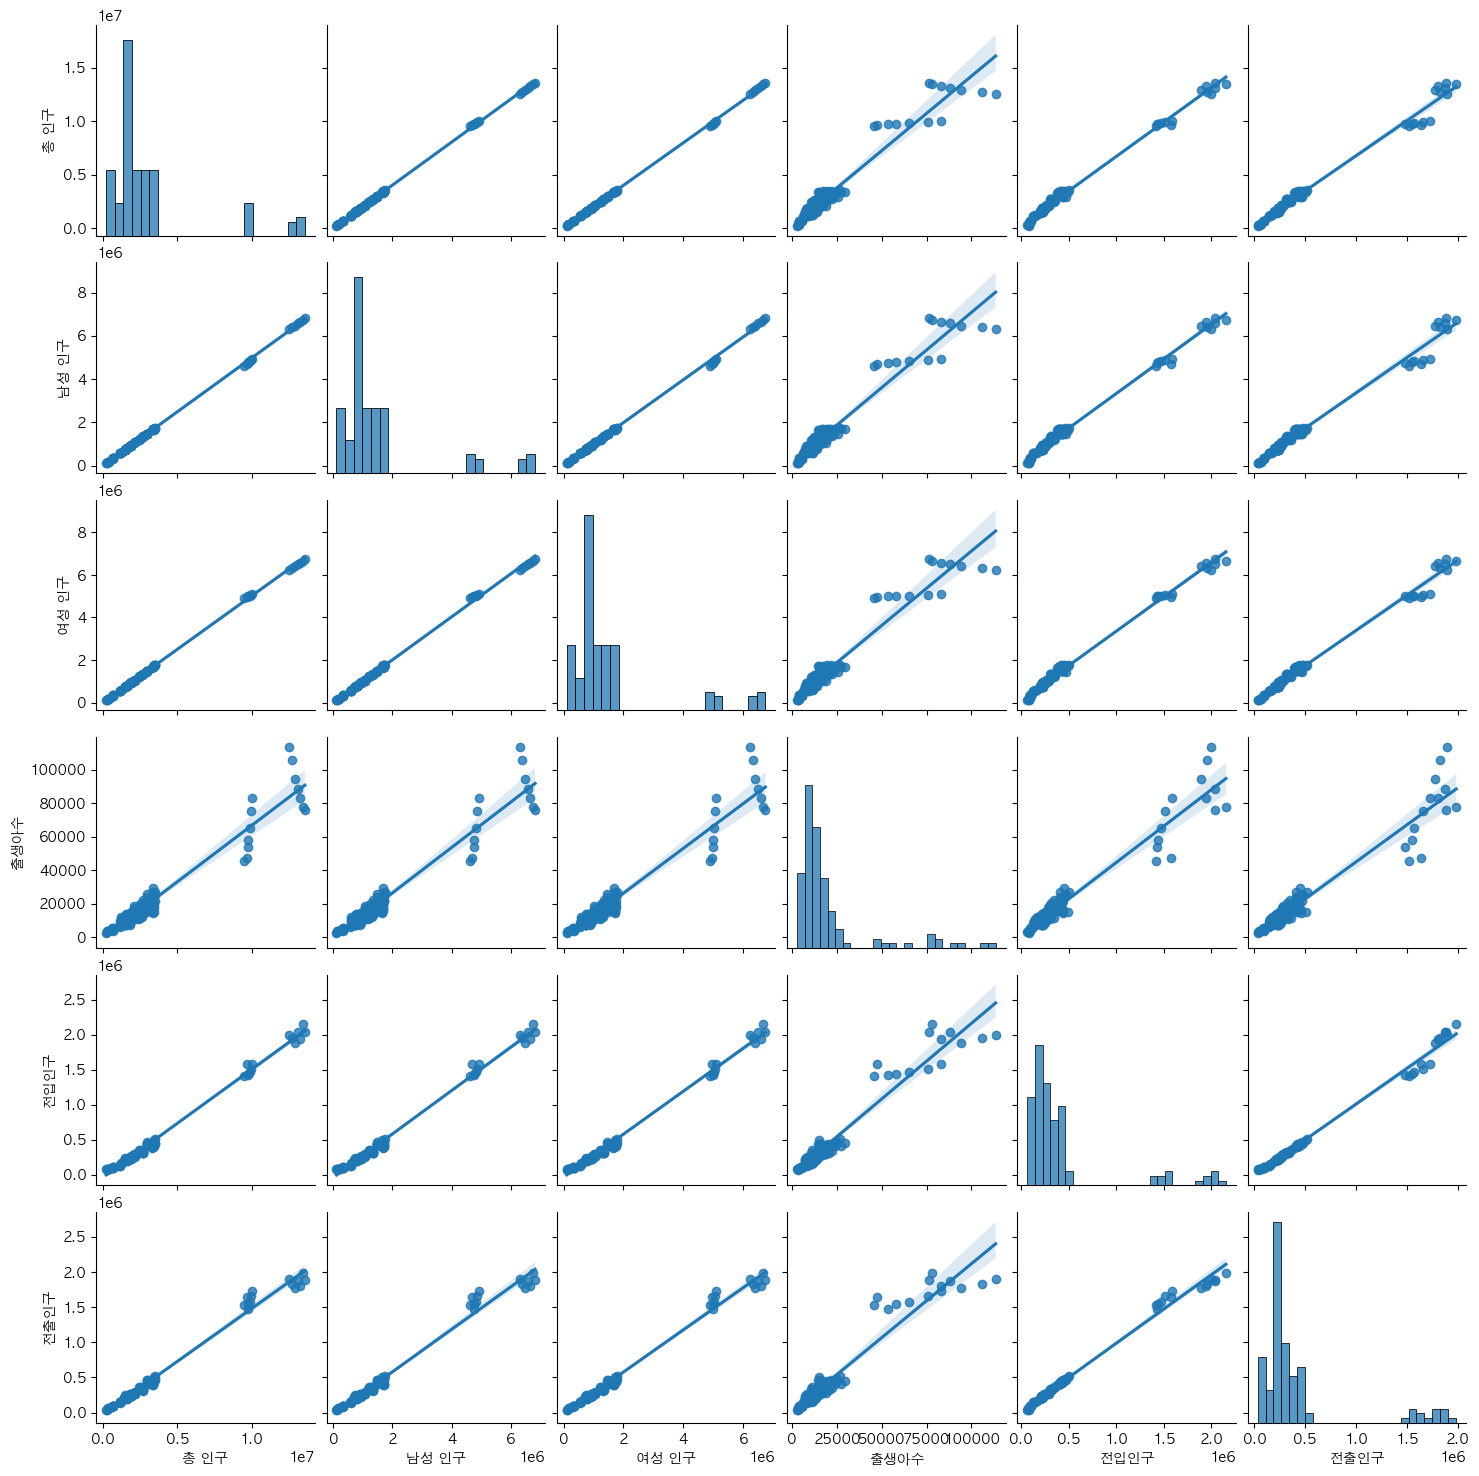

In [11]:
# ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구'] 대한 상관관계 시각화
target_col = ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구']

sns.pairplot(
    df_3[target_col],
    vars = target_col,
    kind = 'reg'
)
plt.show()

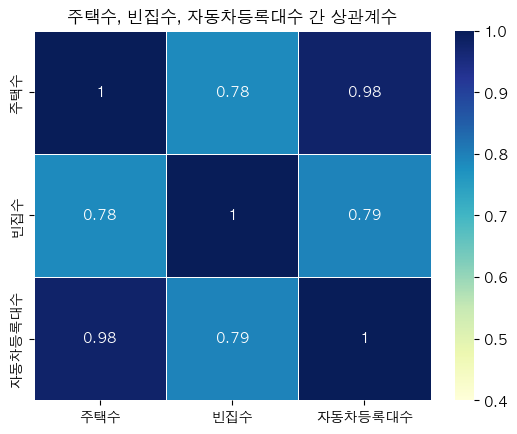

In [76]:
# ['주택수','빈집수','자동차등록대수'] 대한 상관관계 시각화
# target_col = ['출생아수','전입인구','전출인구','주택수','빈집수','자동차등록대수']
target_col = ['주택수','빈집수','자동차등록대수']

# plt.figure(figsize=(10,10))
sns.heatmap(
    df_3[target_col].corr(),
    annot = True, # True로 해야 숫자가 보임
    # fmt = 'f', # 실수
    cmap='YlGnBu',
    vmin=0.4, vmax=1,
    linewidth = 0.5
)
plt.title('주택수, 빈집수, 자동차등록대수 간 상관계수')
plt.show()

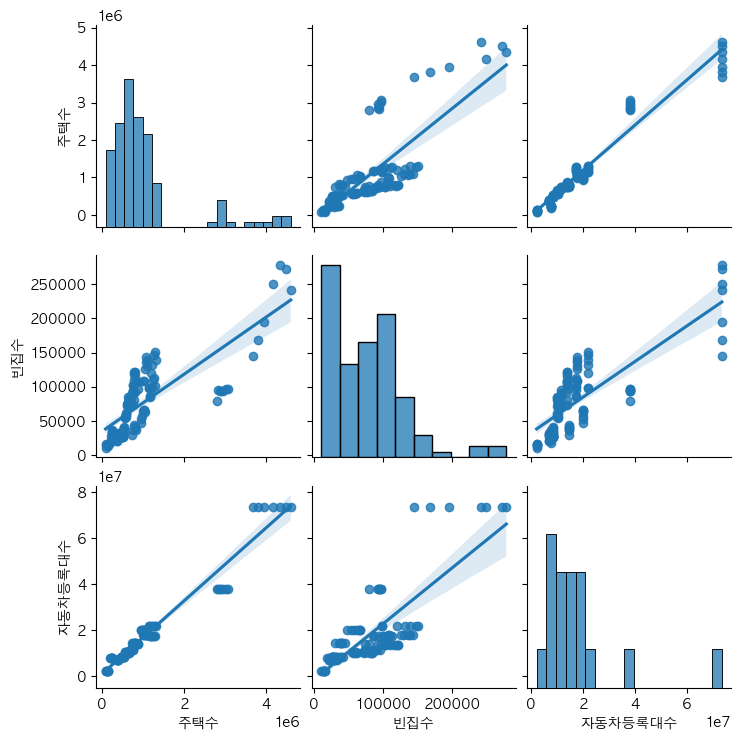

In [13]:
# ['주택수','빈집수','자동차등록대수'] 대한 상관관계 시각화
# target_col = ['출생아수','전입인구','전출인구','주택수','빈집수','자동차등록대수']
target_col = ['주택수','빈집수','자동차등록대수']

sns.pairplot(
    df_3[target_col],
    vars = target_col,
    kind = 'reg'
)
plt.show()

----
# 각 컬럼과 전출인구를 기준으로 산포도 확인

## 인구

In [ ]:
# ['총 인구','남성 인구','여성 인구','출생아수','전입인구','전출인구'] 대한 산포도 시각화

Text(0, 0.5, '전출인구(단위: 1000명)')

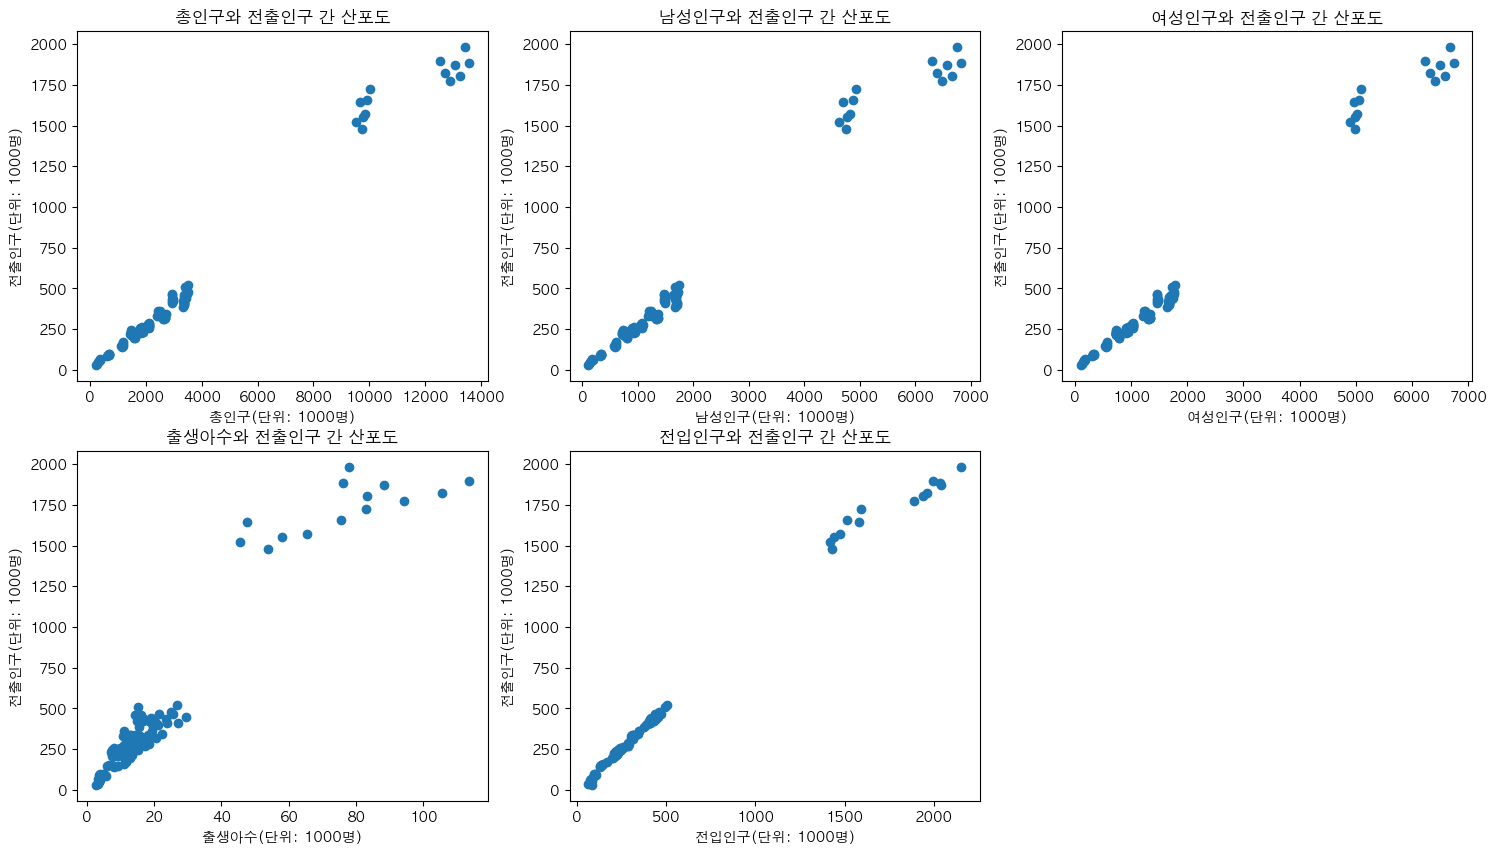

In [44]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
# ax6 = fig.add_subplot(2,3,6)

ax1.scatter(x=df_3['총 인구']/1000, y=df_3['전출인구']/1000,)
ax2.scatter(x=df_3['남성 인구']/1000, y=df_3['전출인구']/1000,)
ax3.scatter(x=df_3['여성 인구']/1000, y=df_3['전출인구']/1000,)
ax4.scatter(x=df_3['출생아수']/1000, y=df_3['전출인구']/1000,)
ax5.scatter(x=df_3['전입인구']/1000, y=df_3['전출인구']/1000,)
# ax6.scatter(x=df_3['전출인구']/1000, y=df_3['전출인구']/1000,)

ax1.set_title("총인구와 전출인구 간 산포도")
ax2.set_title("남성인구와 전출인구 간 산포도")
ax3.set_title("여성인구와 전출인구 간 산포도")
ax4.set_title("출생아수와 전출인구 간 산포도")
ax5.set_title("전입인구와 전출인구 간 산포도")
# ax6.set_title("전출인구와 전출인구 간 산포도")

ax1.set_xlabel("총인구(단위: 1000명)")
ax2.set_xlabel("남성인구(단위: 1000명)")
ax3.set_xlabel("여성인구(단위: 1000명)")
ax4.set_xlabel("출생아수(단위: 1000명)")
ax5.set_xlabel("전입인구(단위: 1000명)")
# ax6.set_xlabel("전출인구(단위: 1000명)")

ax1.set_ylabel("전출인구(단위: 1000명)")
ax2.set_ylabel("전출인구(단위: 1000명)")
ax3.set_ylabel("전출인구(단위: 1000명)")
ax4.set_ylabel("전출인구(단위: 1000명)")
ax5.set_ylabel("전출인구(단위: 1000명)")
# ax6.set_ylabel("전출인구(단위: 1000명)")

## 기타

In [ ]:
# ['주택수','빈집수','자동차등록대수'] 대한 상관관계 시각화

Text(0, 0.5, '전출인구(단위: 1000명)')

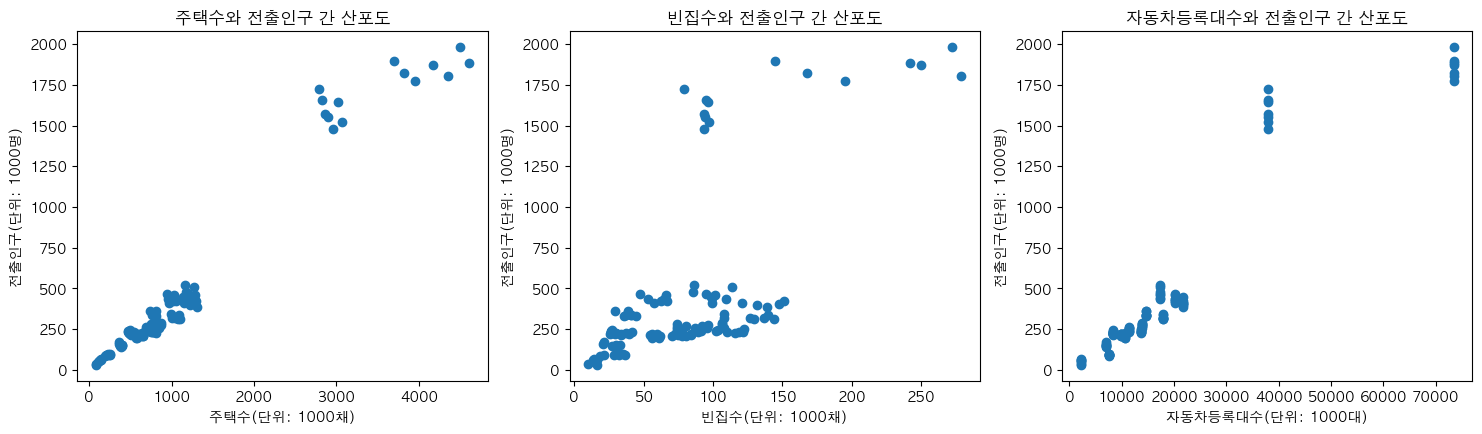

In [47]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

ax1.scatter(x=df_3['주택수']/1000, y=df_3['전출인구']/1000,)
ax2.scatter(x=df_3['빈집수']/1000, y=df_3['전출인구']/1000,)
ax3.scatter(x=df_3['자동차등록대수']/1000, y=df_3['전출인구']/1000,)

ax1.set_title("주택수와 전출인구 간 산포도")
ax2.set_title("빈집수와 전출인구 간 산포도")
ax3.set_title("자동차등록대수와 전출인구 간 산포도")

ax1.set_xlabel("주택수(단위: 1000채)")
ax2.set_xlabel("빈집수(단위: 1000채)")
ax3.set_xlabel("자동차등록대수(단위: 1000대)")

ax1.set_ylabel("전출인구(단위: 1000명)")
ax2.set_ylabel("전출인구(단위: 1000명)")
ax3.set_ylabel("전출인구(단위: 1000명)")

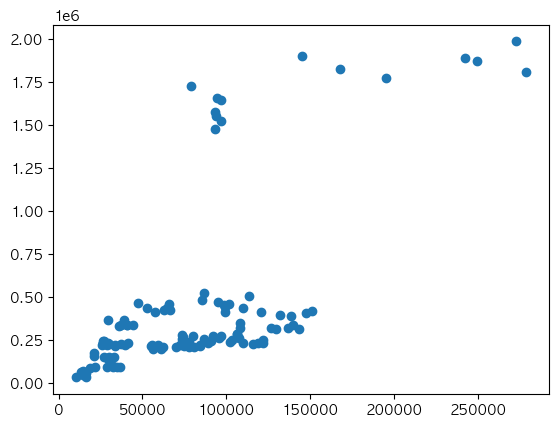

In [14]:


plt.scatter(
    data=df_3,
    x='빈집수',
    y='전출인구'
)